In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, MaxPooling1D, Flatten, Conv1D
from  tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

import os
print(os.getcwd())
os.environ['TF_DETERMINISTIC_OPS'] = '1'

2024-04-27 17:39:09.002977: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/Users/artur/Documents/Studia/Magisterka_init/approaches/canny_edges


In [2]:
import cv2

const = 32

data_folder_path = f'data_fir_{const}'  # You will need to set this to your data folder path

# Initialize an empty list to store data
data_list = []

# Walk through the directory
for label in os.listdir(data_folder_path):
    label_path = os.path.join(data_folder_path, label)
    if os.path.isdir(label_path):
        labels_path = os.listdir(label_path)
        if ".DS_Store" in labels_path:
            labels_path.remove(".DS_Store")
        sorted_list_0 = sorted(labels_path, key=lambda x: int(x))
        for video_id in sorted_list_0:
            video_id_path = os.path.join(label_path, video_id)
            if os.path.isdir(video_id_path):
                sorted_list = sorted(os.listdir(video_id_path), key=lambda x: int(x.split('.')[0]))
                for frame_id_file in sorted_list:
                    frame_id, ext = os.path.splitext(frame_id_file)
                    if ext.lower() == '.jpg':
                        file_path = os.path.join(video_id_path, frame_id_file)
                        # Read the image
                        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            # Flatten the image data and convert to a list
                            img_data = img.flatten().tolist()
                            if len(img_data) != const * const:
                                continue
                            print(f"appending {label} {video_id} {frame_id}")
                            # Append the data to the list
                            data_list.append({'label': label, 'video_id': video_id, 'frame_id': int(frame_id), 'data': img_data})

# Create the DataFrame
df = pd.DataFrame(data_list)
print(df.shape)

appending CH 0 0
appending CH 0 1
appending CH 0 2
appending CH 0 3
appending CH 0 4
appending CH 0 5
appending CH 0 6
appending CH 0 7
appending CH 0 8
appending CH 0 9
appending CH 0 10
appending CH 0 11
appending CH 0 12
appending CH 0 13
appending CH 0 14
appending CH 0 15
appending CH 0 16
appending CH 0 17
appending CH 0 18
appending CH 0 19
appending CH 0 20
appending CH 0 21
appending CH 0 22
appending CH 0 23
appending CH 0 24
appending CH 0 25
appending CH 0 26
appending CH 0 27
appending CH 0 28
appending CH 0 29
appending CH 0 30
appending CH 0 31
appending CH 0 32
appending CH 0 33
appending CH 0 34
appending CH 0 35
appending CH 0 36
appending CH 0 37
appending CH 0 38
appending CH 0 39
appending CH 0 40
appending CH 0 41
appending CH 0 42
appending CH 0 43
appending CH 0 44
appending CH 0 45
appending CH 0 46
appending CH 0 47
appending CH 0 48
appending CH 0 49
appending CH 1 0
appending CH 1 1
appending CH 1 2
appending CH 1 3
appending CH 1 4
appending CH 1 5
appendin

In [33]:
# TMP TEST
df = pd.read_csv('csvki/32_mix_thresh_bez_tla.csv')

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['label'])
categorical_labels = to_categorical(encoded_labels)

df['data'] = df['data'].apply(eval)
features = np.array(df['data'].tolist())

# features = df.drop(['label', 'video_id', 'frame_id'], axis=1).values

grouped = df.groupby('video_id').apply(lambda x: x.sort_values('frame_id')).reset_index(drop=True)

max_sequence_length_per_video = grouped.groupby('video_id')['frame_id'].count().max()

X = np.zeros((len(grouped['video_id'].unique()), max_sequence_length_per_video, features.shape[1]))
y = np.zeros((len(grouped['video_id'].unique()), categorical_labels.shape[1]))

for i, (video_id, group) in enumerate(grouped.groupby('video_id')):
    X[i, :len(group)] = np.array(group['data'].tolist())
    y[i] = categorical_labels[group.index[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [132]:
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(df['label'])
# categorical_labels = to_categorical(encoded_labels)

/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [11]:
df

,label,video_id,frame_id,data
0,CH,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CH,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CH,0,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CH,0,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CH,0,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
57934,W,1338,70,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
57935,W,1338,71,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
57936,W,1338,72,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
57937,W,1338,73,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [19]:
# df['data'] = df['data'].apply(eval)
df_copy = df.copy()

In [20]:
df['data'] = df['data'].apply(lambda x: [i / 255.0 for i in x])
# df['data'] = df['data'].apply(lambda x: [1 if i != 0 else 0 for i in x])

In [1]:
# features = np.array(df['data'].tolist())
#
# # print(features.shape[1])
# # features = df_copy.drop(['label', 'video_id', 'frame_id'], axis=1).values
#
# grouped = df.groupby('video_id').apply(lambda x: x.sort_values('frame_id')).reset_index(drop=True)
#
# max_sequence_length_per_video = grouped.groupby('video_id')['frame_id'].count().max()
#
# print(max_sequence_length_per_video)
#
# X = np.zeros((len(grouped['video_id'].unique()), max_sequence_length_per_video, features.shape[1]))
# y = np.zeros((len(grouped['video_id'].unique()), categorical_labels.shape[1]))
#
# for i, (video_id, group) in enumerate(grouped.groupby('video_id')):
#     X[i, :len(group)] = np.array(group['data'].tolist())
#     # X[i, :len(group)] = group.drop(['label', 'video_id', 'frame_id'], axis=1)
#     y[i] = categorical_labels[group.index[0]]
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
print(y_train.shape)
print(y_test.shape)

(1028, 33)
(257, 33)


In [34]:
model = Sequential()
model.add(Conv1D(200, kernel_size=2, activation = 'relu', input_shape=(max_sequence_length_per_video, features.shape[1])))
model.add(Conv1D(200, kernel_size=2, activation = 'relu'))
model.add(MaxPooling1D(3))

model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200, return_sequences=False))
model.add(Dense(y_train.shape[1], activation='softmax')) # albo softmax albo sigmoid

optimizer = optimizers.Adam(learning_rate=0.0002) # 8e-05 albo 0.0002
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150)

2024-04-23 21:43:42.453088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-23 21:43:42.453861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-23 21:43:42.454624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/150


2024-04-23 21:43:43.685083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1028,33]
	 [[{{node Placeholder/_11}}]]
2024-04-23 21:43:43.685644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1028,33]
	 [[{{node Placeholder/_11}}]]
2024-04-23 21:43:43.896353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/spl

32/33 [============================>.] - ETA: 0s - loss: 3.4904 - categorical_accuracy: 0.0352

2024-04-23 21:43:50.872377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [257,33]
	 [[{{node Placeholder/_11}}]]
2024-04-23 21:43:50.872608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [257,33]
	 [[{{node Placeholder/_11}}]]
2024-04-23 21:43:51.043070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split

33/33 [==============================] - 8s 171ms/step - loss: 3.4903 - categorical_accuracy: 0.0350 - val_loss: 3.4719 - val_categorical_accuracy: 0.0350
Epoch 2/150
33/33 [==============================] - 5s 145ms/step - loss: 3.4012 - categorical_accuracy: 0.0749 - val_loss: 3.2652 - val_categorical_accuracy: 0.1012
Epoch 3/150
33/33 [==============================] - 5s 148ms/step - loss: 3.0245 - categorical_accuracy: 0.1566 - val_loss: 2.9325 - val_categorical_accuracy: 0.1907
Epoch 4/150
33/33 [==============================] - 5s 146ms/step - loss: 2.5693 - categorical_accuracy: 0.2675 - val_loss: 2.6250 - val_categorical_accuracy: 0.2374
Epoch 5/150
33/33 [==============================] - 5s 145ms/step - loss: 2.1615 - categorical_accuracy: 0.3726 - val_loss: 2.3374 - val_categorical_accuracy: 0.3113
Epoch 6/150
33/33 [==============================] - 5s 146ms/step - loss: 1.9633 - categorical_accuracy: 0.4047 - val_loss: 2.1590 - val_categorical_accuracy: 0.3424
Epoch 7/15

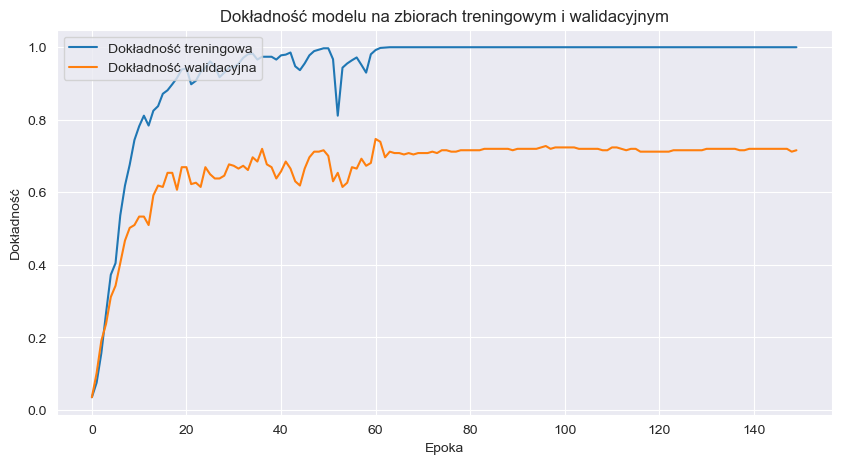

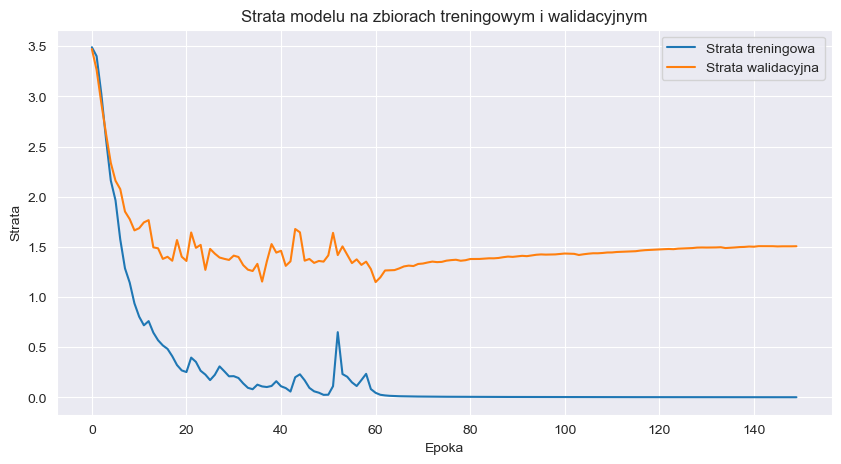

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['categorical_accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_categorical_accuracy'], label='Dokładność walidacyjna')
plt.title('Dokładność modelu na zbiorach treningowym i walidacyjnym')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.title('Strata modelu na zbiorach treningowym i walidacyjnym')
plt.ylabel('Strata')
plt.xlabel('Epoka')
plt.legend(loc='upper right')
plt.show()


2024-04-23 20:28:14.595250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [257,144,1024]
	 [[{{node Placeholder/_10}}]]
2024-04-23 20:28:14.595481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [257,144,1024]
	 [[{{node Placeholder/_10}}]]
2024-04-23 20:28:14.817039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/s

9/9 [==============================] - 1s 50ms/step


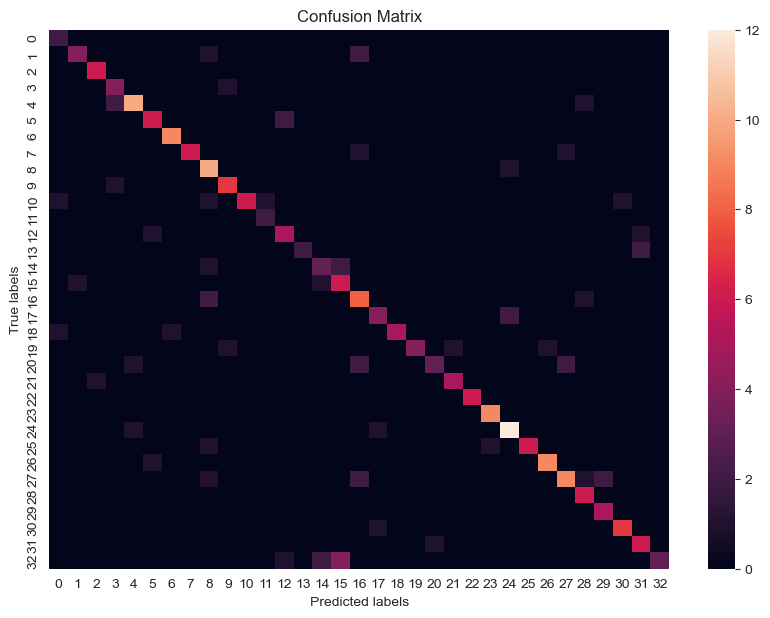

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
from sklearn.metrics import classification_report

class_labels = df['label'].unique()

print(classification_report(y_test_class, y_pred_class, target_names=class_labels))

              precision    recall  f1-score   support

          CH       0.50      1.00      0.67         2
          CZ       1.00      0.86      0.92         7
           Ł       0.80      0.67      0.73         6
           R       0.56      1.00      0.71         5
           U       1.00      0.77      0.87        13
           I       0.73      1.00      0.84         8
           N       0.90      1.00      0.95         9
           G       0.78      0.88      0.82         8
           Z       1.00      1.00      1.00        11
           T       0.86      0.75      0.80         8
          RZ       1.00      0.80      0.89        10
           S       0.67      1.00      0.80         2
           A       0.78      1.00      0.88         7
           Ó       0.50      0.50      0.50         4
           F       0.50      0.67      0.57         6
           O       0.50      0.38      0.43         8
           H       0.60      0.55      0.57        11
          SZ       0.60    